In [1]:
from utils import *

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


# Numerical data

## TFDV

In [2]:
from tfdv import TFDV
tfdv = TFDV(is_numeric=True)
tfdv_precision_real, tfdv_precision_syn, tfdv_recall_real, tfdv_recall_syn = tfdv.parse_result_update()

## Deequ

In [3]:
from deequ import *
deequ = Deequ()
deequ_precision_real, deequ_precision_syn, deequ_recall_real, deequ_recall_syn = deequ.parse_result_update(is_numeric=True)

## Azure Anomaly Detector

In [4]:
from azureAD import *
azure_ad = AzureAD(True)
azure_precision, azure_recall = azure_ad.parse_result_update()

Loading BokehJS ...

## Azure Drift Detector

In [5]:
from azure_drift_detector import *
azure_drift_detector = AzureDriftDetector(True)
add_precision_real,add_precision_syn, add_recall_real, add_recall_syn = azure_drift_detector.parse_result_update()

## AVH-no stationary single+two distribution

In [6]:
import avh_no_stationary as k_v3
k_clause = k_v3.KClause(is_numeric=True)
k_clause.save_base_dir = '../result/k_clause_v3/numeric_result'
k_v3_precision_real, k_v3_precision_syn, k_v3_recall_real, k_v3_recall_syn = k_clause.parse_result_update()

## AVH-with stationary single+two distribution

In [7]:
import avh_with_stationary as k_v4
k_clause = k_v4.KClause(is_numeric=True)
k_clause.save_base_dir = '../result/k_clause_v4/numeric_result'
k_v4_precision_real, k_v4_precision_syn, k_v4_recall_real, k_v4_recall_syn = k_clause.parse_result_update()

## Hypothesis Testing

In [8]:
from hypothesis_test import *
hypo = HypoTest(is_numeric=True, verbose=True)
hypo_precision_real, hypo_precision_syn, hypo_recall_real, hypo_recall_syn = hypo.parse_result_update()

## ML model

In [9]:
#Anomaly Detection

# One-Class SVM
from ml_baseline_single_var import *
import anomaly_detection
ad = AnomalyDetection(is_numeric=True, model_name='svm')
svm_precision_real, svm_precision_syn, svm_recall_real, svm_recall_syn = ad.parse_result_update()

# Isolation Forest
ad = AnomalyDetection(is_numeric=True, model_name='isof')
isof_precision_real, isof_precision_syn, isof_recall_real, isof_recall_syn = ad.parse_result_update()

# LocalOutlierFactor
ad = AnomalyDetection(is_numeric=True, model_name='lof')
lof_precision_real, lof_precision_syn, lof_recall_real, lof_recall_syn = ad.parse_result_update()

# ECOD
ad = AnomalyDetection(is_numeric=True, model_name='ecod')
ecod_precision_real, ecod_precision_syn, ecod_recall_real, ecod_recall_syn = ad.parse_result_update()

# telemanom
ad = AnomalyDetection(is_numeric=True, model_name='telemanom')
tele_precision_real, tele_precision_syn, tele_recall_real, tele_recall_syn = ad.parse_result_update()

In [10]:
# COF
ad = AnomalyDetection(is_numeric=True, model_name='cof')
cof_precision_real, cof_precision_syn, cof_recall_real, cof_recall_syn = ad.parse_result_update()

# K-Meansad
ad = AnomalyDetection(is_numeric=True, model_name='kmeans')
kmeans_precision_real, kmeans_precision_syn, kmeans_recall_real, kmeans_recall_syn = ad.parse_result_update()

# Health-ESN
ad = AnomalyDetection(is_numeric=True, model_name='health_esn')
health_precision_real, health_precision_syn, health_recall_real, health_recall_syn = ad.parse_result_update()

# Health-ESN
ad = AnomalyDetection(is_numeric=True, model_name='lstmad')
lstmad_precision_real, lstmad_precision_syn, lstmad_recall_real, lstmad_recall_syn = ad.parse_result_update()

## Seq Dep

In [11]:
from seq_dependency import *
scale_range = np.arange(1, 100, 1)
seq_dep = SeqDep(is_numeric=True, scale_range=scale_range, verbose=True)
precision_real_seq, precision_syn_seq, recall_real_seq, recall_syn_seq = seq_dep.parse_result_all_metric()


## Order Dep

In [12]:
from order_dependency import *
order_dep = OrderDep(is_numeric=True, scale_range=scale_range, verbose=True)
precision_real_order, precision_syn_order, recall_real_order, recall_syn_order = order_dep.parse_result_all_metric()

In [13]:
from fd_order_dependency import *
fd_order_dep = FDOrderDep(is_numeric=True, scale_range=scale_range, verbose=True)
precision_real_fdorder, precision_syn_fdorder, recall_real_fdorder, recall_syn_fdorder = fd_order_dep.parse_result_all_metric()

## MAD

In [14]:
from mad import *
scale_range = np.arange(1, 100, 1)
mad = MAD(is_numeric=True, scale_range=scale_range, verbose=True)
# mad.test_syn_real(mad.dir_names[5])
mad_precision_real, mad_precision_syn, mad_recall_real, mad_recall_syn = mad.parse_result_update()

mad_precision_real = mad_precision_real[::100]
mad_precision_syn = mad_precision_syn[::100]
mad_recall_real = mad_recall_real[::100]
mad_recall_syn = mad_recall_syn[::100]

## Avg-KNN

In [ ]:
import DQ_test
dq = DQ_test.DQTest(is_numeric=True)
knn_precision_real, knn_precision_syn, knn_recall_real, knn_recall_syn, auc_real, auc_syn = dq.parse_result_update()

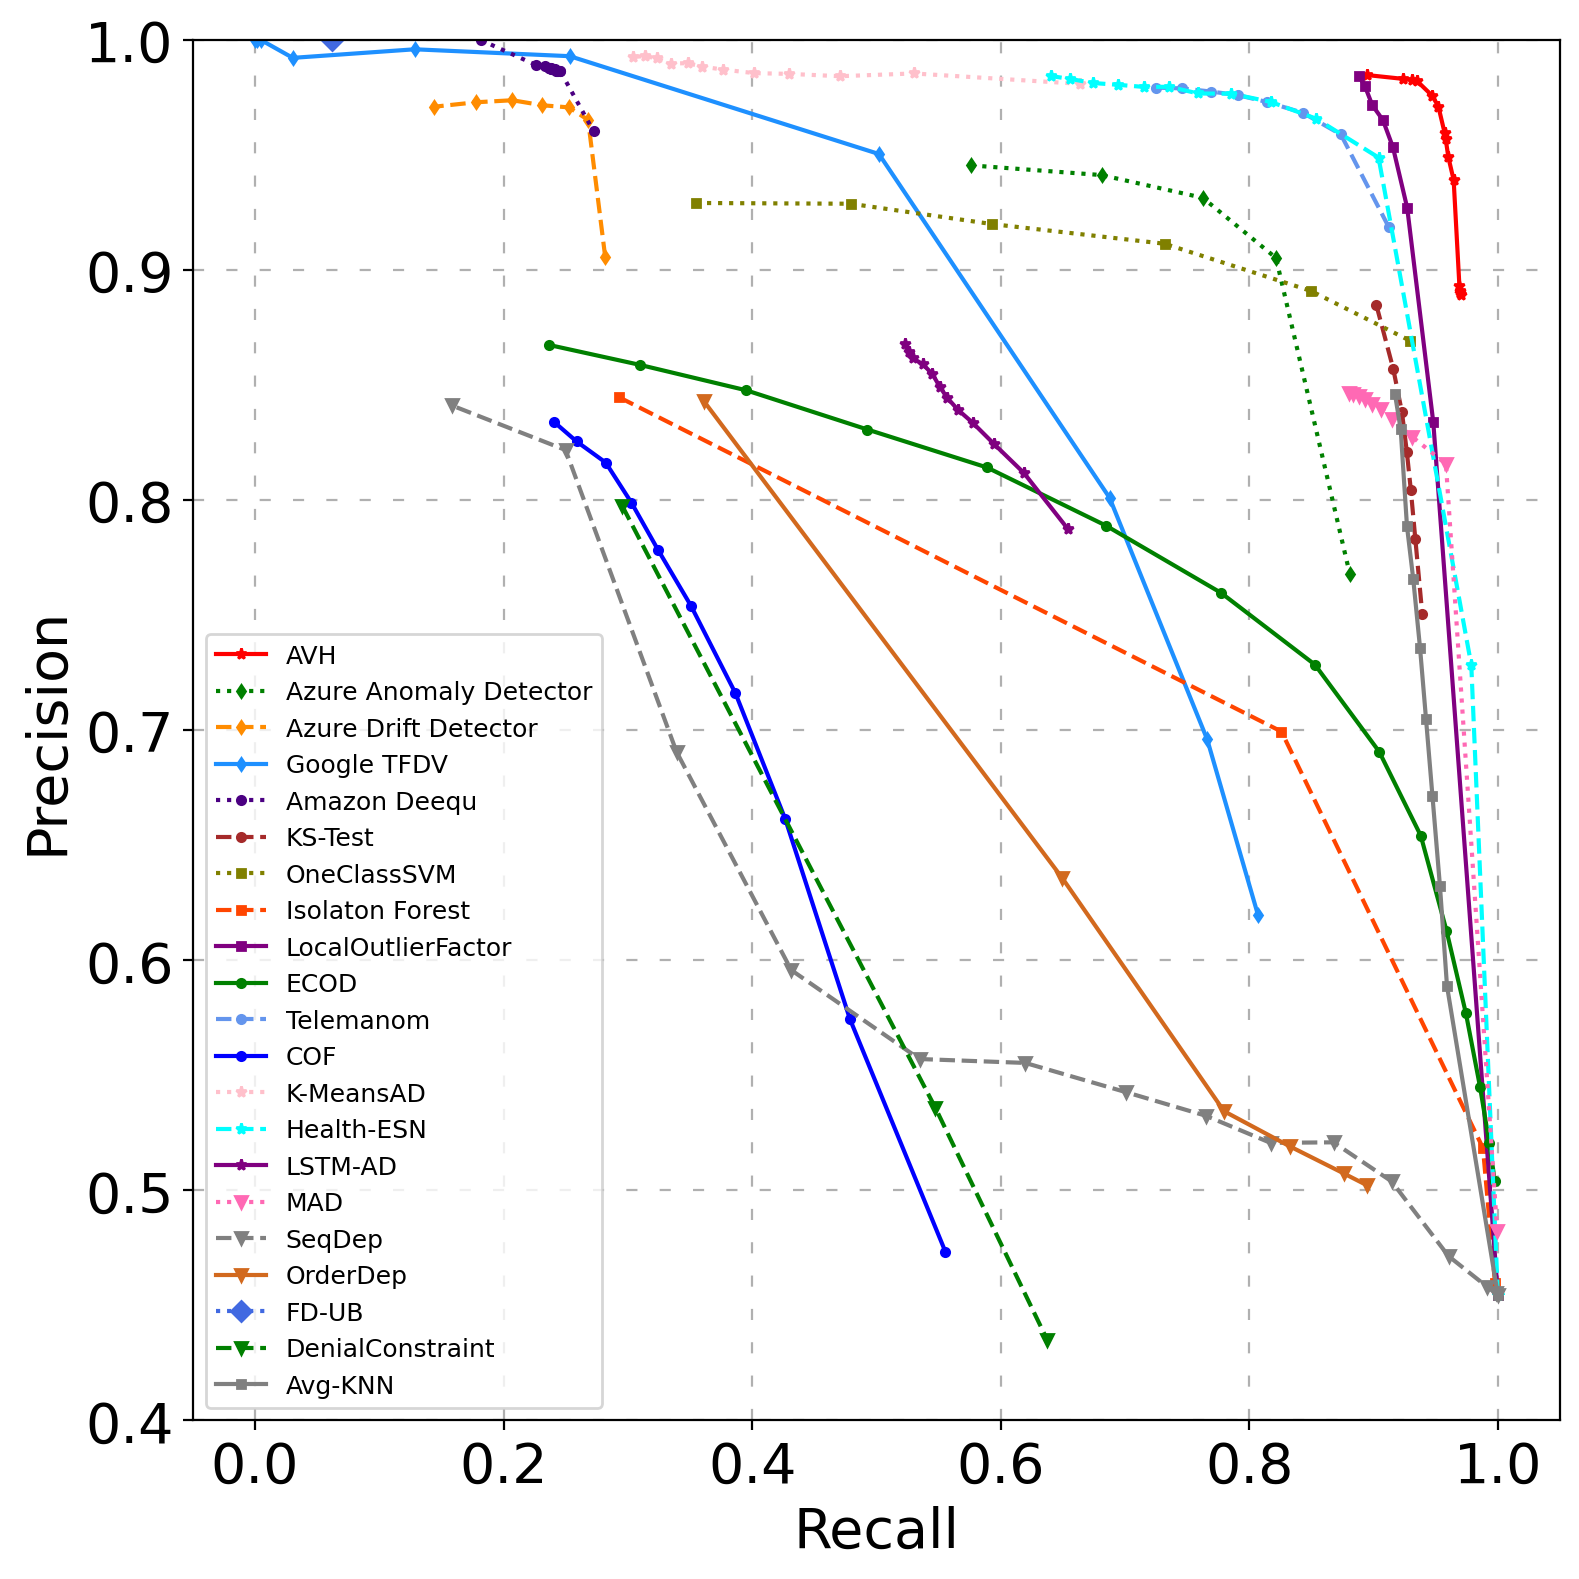

In [31]:
plt.figure(figsize=(8, 8), dpi=200)

############################################
# AVH
plt.plot(k_v4_recall_real, k_v4_precision_real, linestyle='solid', linewidth=1.5, 
         label="AVH", marker='*', markersize=4, c='red')

# # Azure Anomaly Detector
plt.plot(azure_recall[1:], azure_precision[1:], linestyle='dotted', linewidth=1.5, 
         label="Azure Anomaly Detector", marker='d', markersize=3, c='green')
# azure drift detector(add)
plt.plot(add_recall_real[1:8], add_precision_real[1:8], linestyle='dashed', linewidth=1.5, 
         label="Azure Drift Detector", marker='d', markersize=3, c='darkorange')
# # TFDV
plt.plot(tfdv_recall_real[1:14], tfdv_precision_real[1:14], linestyle='solid', linewidth=1.5, 
         label="Google TFDV", marker='d', markersize=3, c='dodgerblue')

# Amazon Deequ
plt.plot(deequ_recall_real, deequ_precision_real, linestyle='dotted', linewidth=1.5, 
         label="Amazon Deequ", marker='o', markersize=3, c='indigo')
# Hypothesis Testing
plt.plot(hypo_recall_real[1:20][::3], hypo_precision_real[1:20][::3], linestyle='dashed', linewidth=1.5, 
         label="KS-Test", marker='o', markersize=3, c='brown')

# Anomaly Detection
plt.plot(svm_recall_real[989:995:], svm_precision_real[989:995:], linestyle='dotted', linewidth=1.5, 
         label="OneClassSVM", marker='s', markersize=3, c='olive')

plt.plot(isof_recall_real[999:], isof_precision_real[999:], linestyle='dashed', linewidth=1.5, 
         label="Isolaton Forest", marker='s', markersize=3, c='orangered')

plt.plot(lof_recall_real[994:], lof_precision_real[994:], linestyle='solid', linewidth=1.5, 
         label="LocalOutlierFactor", marker='s', markersize=3, c='purple')

plt.plot(ecod_recall_real[4:19], ecod_precision_real[4:19], linestyle='solid', linewidth=1.5, 
         label="ECOD", marker='o', markersize=3, c='green')

plt.plot(tele_recall_real[:1000:100][2:], tele_precision_real[:1000:100][2:], linestyle='dashed', linewidth=1.5, 
         label="Telemanom", marker='o', markersize=3, c='cornflowerblue')

plt.plot(cof_recall_real[100:200:10], cof_precision_real[100:200:10], linestyle='solid', linewidth=1.5, 
         label="COF", marker='o', markersize=3, c='blue')

plt.plot(kmeans_recall_real[::80][1:], kmeans_precision_real[::80][1:], linestyle='dotted', linewidth=1.5, 
             label="K-MeansAD", marker='*', markersize=4, c='pink')

plt.plot(health_recall_real[::80][1:], health_precision_real[::80][1:], linestyle='dashed', linewidth=1.5, 
             label="Health-ESN", marker='*', markersize=4, c='cyan')

plt.plot(lstmad_recall_real[::80][1:], lstmad_precision_real[::80][1:], linestyle='solid', linewidth=1.5, 
             label="LSTM-AD", marker='*', markersize=4, c='purple')

plt.plot(mad_recall_real, mad_precision_real, linestyle='dotted', linewidth=1.5, 
         label="MAD", marker='v', markersize=4, c='hotpink')
plt.plot(recall_real_seq, precision_real_seq, linestyle='dashed', linewidth=1.5, 
         label="SeqDep", marker='v', markersize=4, c='grey')
plt.plot(recall_real_order[:6], precision_real_order[:6], linestyle='solid', linewidth=1.5, 
             label="OrderDep", marker='v', markersize=4, c='chocolate')
plt.plot(0.062, 1.0, linestyle='dotted', linewidth=1.5, 
         label="FD-UB", marker='D', markersize=5, c='royalblue')

plt.plot(recall_real_fdorder[:3], precision_real_fdorder[:3], linestyle='dashed', linewidth=1.5, 
             label="DenialConstraint", marker='v', markersize=4, c='green')

plt.plot(knn_recall_real[::5], knn_precision_real[::5], linestyle='solid', linewidth=1.5, 
             label="Avg-KNN", marker='s', markersize=3, c='grey')


plt.xlabel('Recall', fontdict={'size' : 20})
plt.ylabel('Precision', fontdict={'size' : 20})
plt.ylim(0.4, 1)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.grid(linestyle=(0, (5, 10)))

plt.legend(loc='lower left', prop={'size': 9})
plt.tight_layout()
plt.show()

## Test on syn

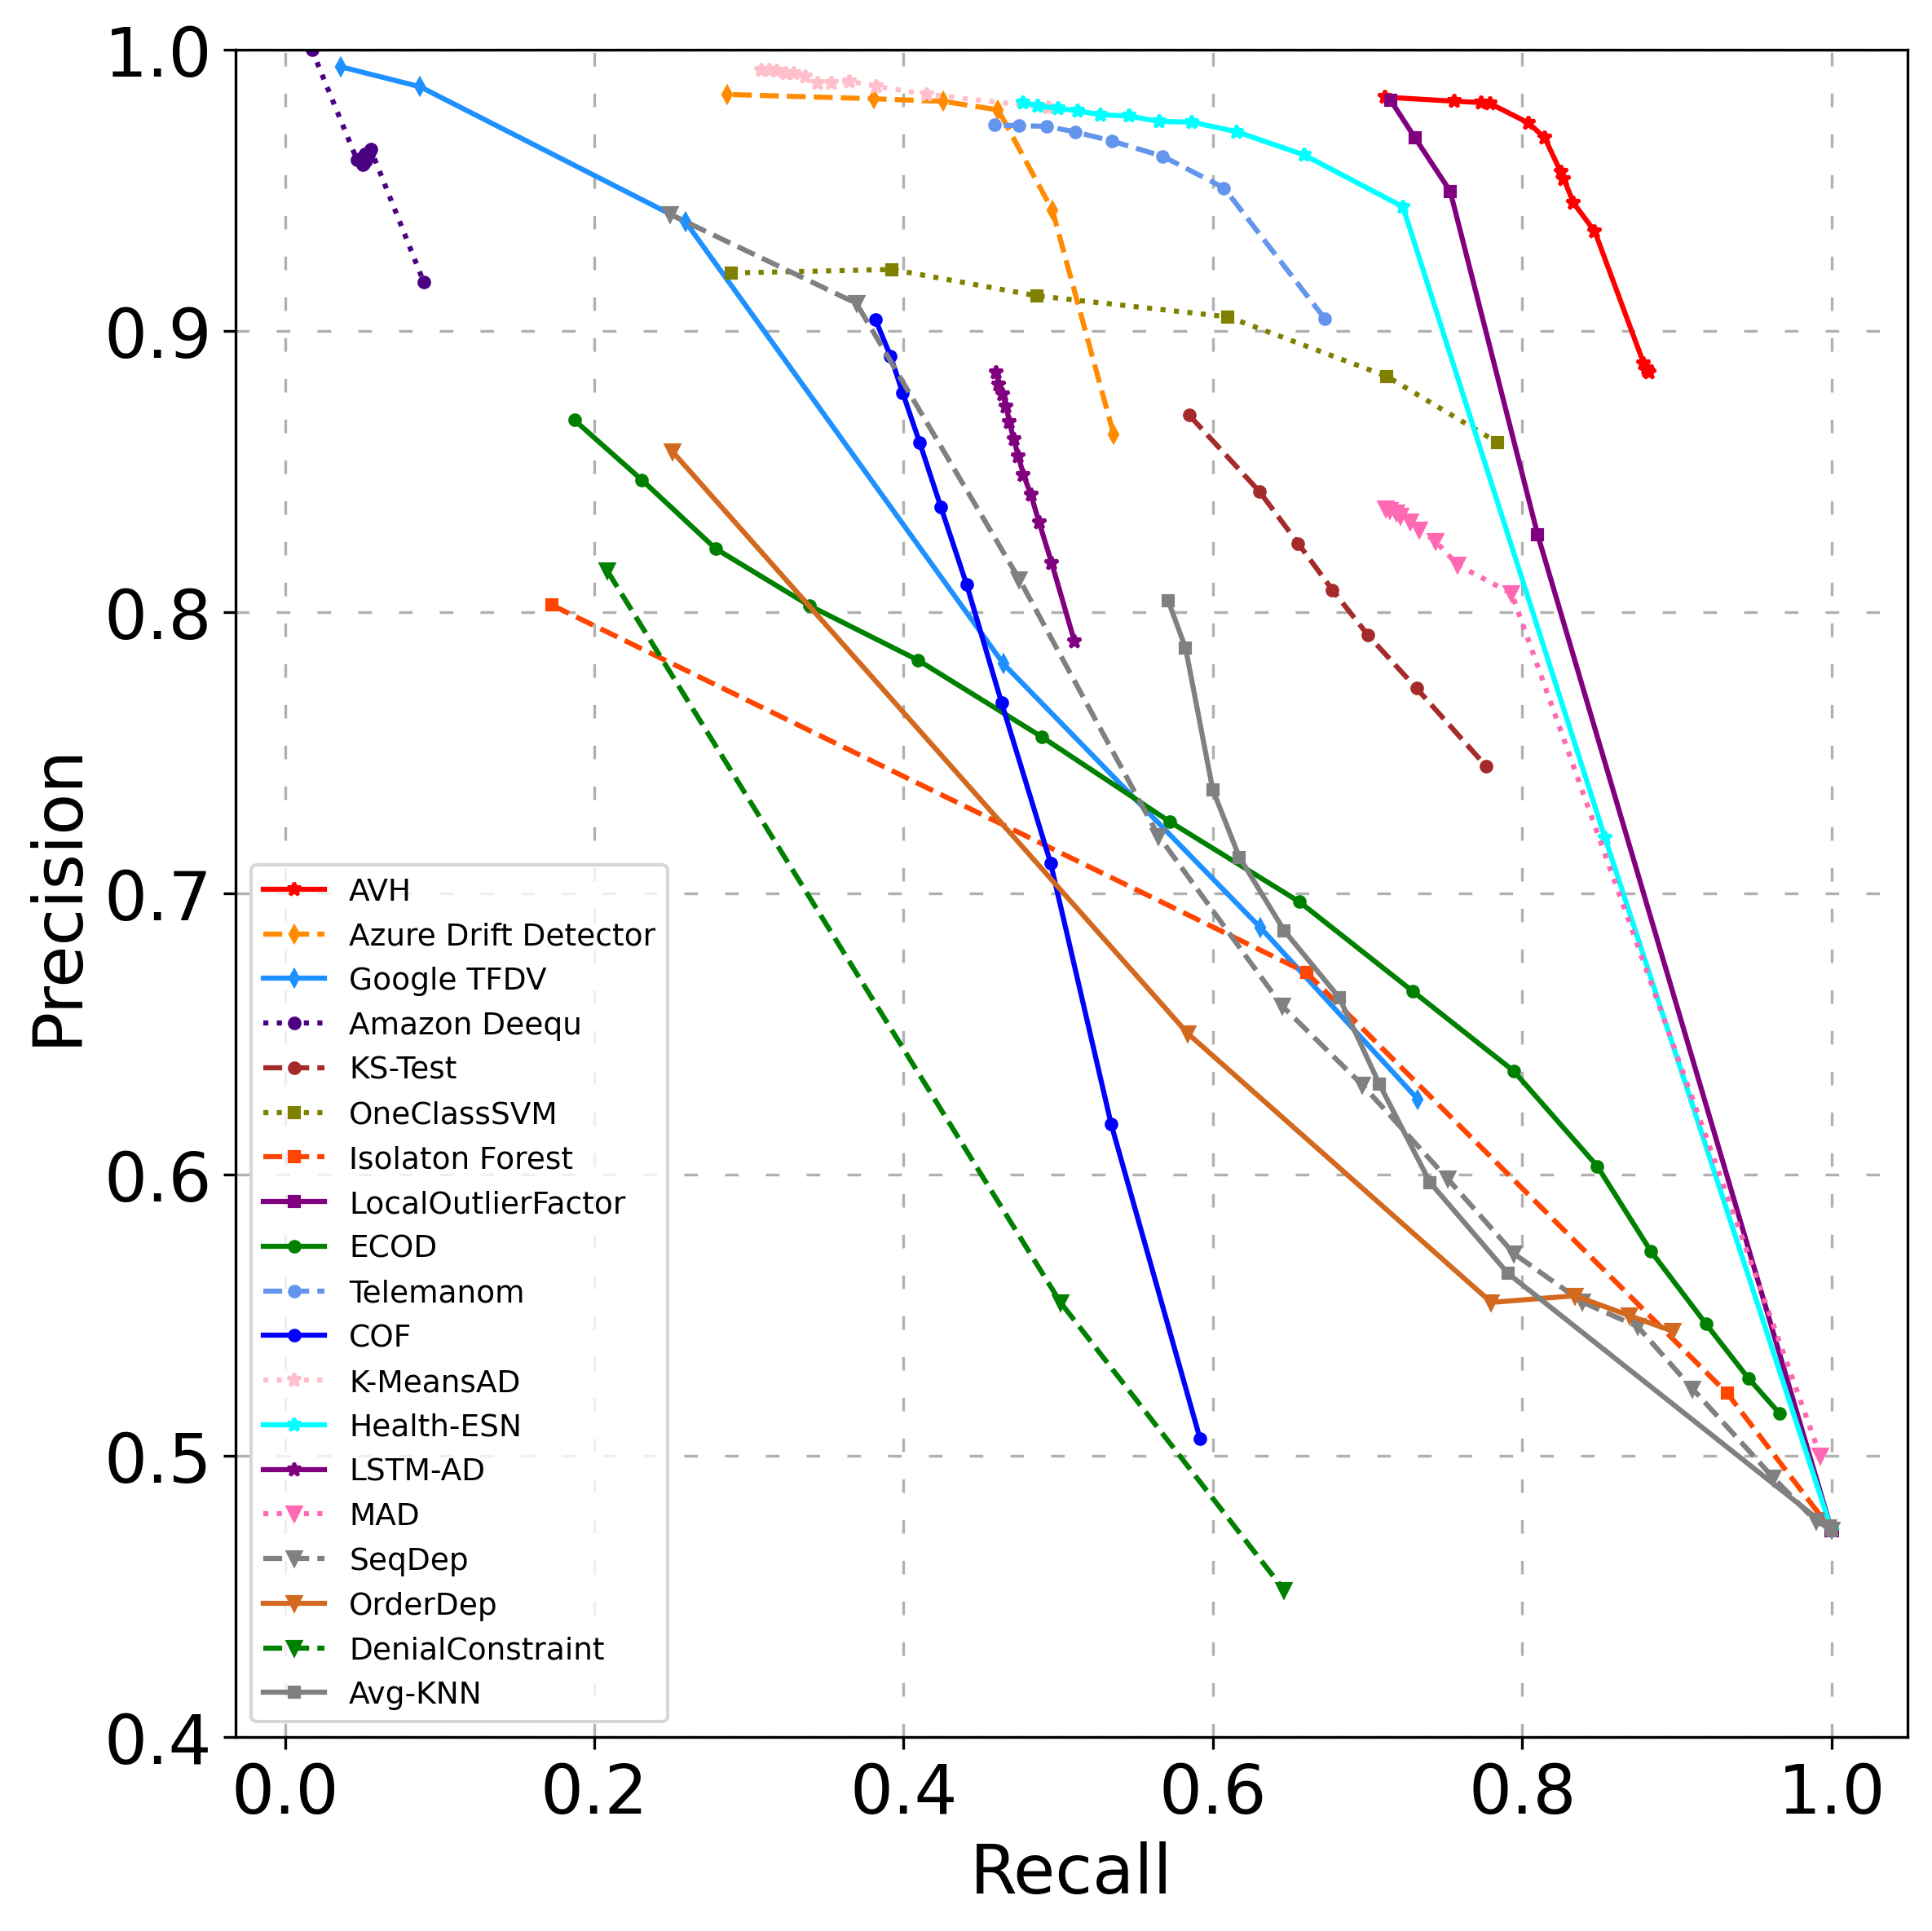

In [34]:
plt.figure(figsize=(8, 8), dpi=300)

# AVH
plt.plot(k_v4_recall_syn, k_v4_precision_syn, linestyle='solid', linewidth=1.5, 
         label="AVH", marker='*', markersize=4, c='r')
# azure drift detector(add)
plt.plot(add_recall_syn[:6], add_precision_syn[:6], linestyle='dashed', linewidth=1.5, 
         label="Azure Drift Detector", marker='d', markersize=3, c='darkorange')
# TFDV
plt.plot(tfdv_recall_syn[1:7], tfdv_precision_syn[1:7], linestyle='solid', linewidth=1.5, 
         label="Google TFDV", marker='d', markersize=3, c='dodgerblue')

# Amazon Deequ
plt.plot(deequ_recall_syn, deequ_precision_syn, linestyle='dotted', linewidth=1.5, 
         label="Amazon Deequ", marker='o', markersize=3, c='indigo')
# # Hypothesis Testing
plt.plot(hypo_recall_syn[1:20][::3], hypo_precision_syn[1:20][::3], linestyle='dashed', linewidth=1.5, 
         label="KS-Test", marker='o', markersize=3, c='brown')


# Anomaly Detection
plt.plot(svm_recall_syn[989:995:], svm_precision_syn[989:995:], linestyle='dotted', linewidth=1.5, 
         label="OneClassSVM", marker='s', markersize=3, c='olive')
plt.plot(isof_recall_syn[999:], isof_precision_syn[999:], linestyle='dashed', linewidth=1.5, 
         label="Isolaton Forest", marker='s', markersize=3, c='orangered')
plt.plot(lof_recall_syn[994::2], lof_precision_syn[994::2], linestyle='solid', linewidth=1.5, 
         label="LocalOutlierFactor", marker='s', markersize=3, c='purple')

plt.plot(ecod_recall_syn[4:19], ecod_precision_syn[4:19], linestyle='solid', linewidth=1.5, 
         label="ECOD", marker='o', markersize=3, c='green')

plt.plot(tele_recall_syn[:1000:100][2:], tele_precision_syn[:1000:100][2:], linestyle='dashed', linewidth=1.5, 
         label="Telemanom", marker='o', markersize=3, c='cornflowerblue')
plt.plot(cof_recall_syn[100:200:10], cof_precision_syn[100:200:10], linestyle='solid', linewidth=1.5, 
         label="COF", marker='o', markersize=3, c='blue')

plt.plot(kmeans_recall_syn[::80][1:], kmeans_precision_syn[::80][1:], linestyle='dotted', linewidth=1.5, 
             label="K-MeansAD", marker='*', markersize=4, c='pink')
plt.plot(health_recall_syn[::80][1:], health_precision_syn[::80][1:], linestyle='solid', linewidth=1.5, 
             label="Health-ESN", marker='*', markersize=4, c='cyan')
plt.plot(lstmad_recall_syn[::80][1:], lstmad_precision_syn[::80][1:], linestyle='solid', linewidth=1.5, 
             label="LSTM-AD", marker='*', markersize=4, c='purple')

plt.plot(mad_recall_syn, mad_precision_syn, linestyle='dotted', linewidth=1.5, 
         label="MAD", marker='v', markersize=4, c='hotpink')
plt.plot(recall_syn_seq, precision_syn_seq, linestyle='dashed', linewidth=1.5, 
         label="SeqDep", marker='v', markersize=4, c='grey')
plt.plot(recall_syn_order[:6], np.array(precision_syn_order[:6]), linestyle='solid', linewidth=1.5, 
         label="OrderDep", marker='v', markersize=4, c='chocolate')

plt.plot(recall_syn_fdorder[:3], precision_syn_fdorder[:3], linestyle='dashed', linewidth=1.5, 
             label="DenialConstraint", marker='v', markersize=4, c='green')

plt.plot(knn_recall_syn[::5], knn_precision_syn[::5], linestyle='solid', linewidth=1.5, 
         label="Avg-KNN", marker='s', markersize=3, c='grey')



plt.xlabel('Recall', fontdict={'size' : 20})
plt.ylabel('Precision', fontdict={'size' : 20})
plt.ylim(0.4, 1)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.grid(linestyle=(0, (5, 10)))

plt.legend(loc='lower left', prop={'size': 9})
plt.tight_layout()
plt.show()

# Categorical data

## TFDV

In [158]:
from tfdv import *

tfdv = TFDV(is_numeric=False)
tfdv_precision_real, tfdv_precision_syn, tfdv_recall_real, tfdv_recall_syn = tfdv.parse_result_update()

## Deequ

In [159]:
from deequ import *
deequ = Deequ()
deequ_precision_real, deequ_precision_syn, deequ_recall_real, deequ_recall_syn = deequ.parse_result_update(is_numeric=False)

## Azure Anomaly Detector

In [160]:
from azureAD import *
azure_ad = AzureAD(False)
azure_precision, azure_recall = azure_ad.parse_result_update()

## AVH-no stationary single+two distribution

In [161]:
import avh_no_stationary as k_v3
k_clause = k_v3.KClause(is_numeric=False)
k_clause.save_base_dir = '../result/k_clause_v3/category_result'
k_v3_precision_real, k_v3_precision_syn, k_v3_recall_real, k_v3_recall_syn = k_clause.parse_result_update()

## AVH-with stationary single+two distribution

In [162]:
import avh_with_stationary as k_v4
k_clause = k_v4.KClause(is_numeric=False)
k_clause.save_base_dir = '../result/k_clause_v4/category_result0227'
k_v4_precision_real, k_v4_precision_syn, k_v4_recall_real, k_v4_recall_syn = k_clause.parse_result_update()

## ML Model

In [163]:
# One-Class SVM
from ml_baseline_single_var import *
ad = AnomalyDetection(is_numeric=False, model_name='svm')
svm_precision_real, svm_precision_syn, svm_recall_real, svm_recall_syn = ad.parse_result_update()

# Isolation Forest
ad = AnomalyDetection(is_numeric=False, model_name='isof')
isof_precision_real, isof_precision_syn, isof_recall_real, isof_recall_syn = ad.parse_result_update()

# LocalOutlierFactor
ad = AnomalyDetection(is_numeric=False, model_name='lof')
lof_precision_real, lof_precision_syn, lof_recall_real, lof_recall_syn = ad.parse_result_update()

# XGboost
sm = SupervisedModel(is_numeric=False, model_name='xgb')
xgb_precision_real, xgb_precision_syn, xgb_recall_real, xgb_recall_syn = sm.parse_result_update()

In [166]:
# ECOD
ad = AnomalyDetection(is_numeric=False, model_name='ecod')
ecod_precision_real, ecod_precision_syn, ecod_recall_real, ecod_recall_syn = ad.parse_result_update()

# # deeplog
ad = AnomalyDetection(is_numeric=False, model_name='deeplog')
deeplog_precision_real, deeplog_precision_syn, deeplog_recall_real, deeplog_recall_syn = ad.parse_result_update()

# # telemanom
ad = AnomalyDetection(is_numeric=False, model_name='telemanom')
tele_precision_real, tele_precision_syn, tele_recall_real, tele_recall_syn = ad.parse_result_update()

In [167]:
# COF
ad = AnomalyDetection(is_numeric=False, model_name='cof')
cof_precision_real, cof_precision_syn, cof_recall_real, cof_recall_syn = ad.parse_result_update()

# K-Means
ad = AnomalyDetection(is_numeric=False, model_name='kmeans')
kmeans_precision_real, kmeans_precision_syn, kmeans_recall_real, kmeans_recall_syn = ad.parse_result_update()

# Health-ESN
ad = AnomalyDetection(is_numeric=False, model_name='health_esn')
health_precision_real, health_precision_syn, health_recall_real, health_recall_syn = ad.parse_result_update()

# Health-ESN
ad = AnomalyDetection(is_numeric=False, model_name='lstmad')
lstmad_precision_real, lstmad_precision_syn, lstmad_recall_real, lstmad_recall_syn = ad.parse_result_update()

## Hypothesis Testing

In [168]:
from hypothesis_test import *
hypo = HypoTest(is_numeric=False, verbose=True)
hypo_precision_real, hypo_precision_syn, hypo_recall_real, hypo_recall_syn = hypo.parse_result_update()

## Seq Dep

In [169]:
from seq_dependency import *
scale_range = np.arange(1, 100, 1)
seq_dep = SeqDep(is_numeric=False, scale_range=scale_range, verbose=True)
precision_real_seq, precision_syn_seq, recall_real_seq, recall_syn_seq = seq_dep.parse_result_all_metric()


## Order Dep

In [170]:
from order_dependency import *
order_dep = OrderDep(is_numeric=False, scale_range=scale_range, verbose=True)
precision_real_order, precision_syn_order, recall_real_order, recall_syn_order = order_dep.parse_result_all_metric()

## MAD

In [171]:
from mad import *
scale_range = np.arange(1, 100, 1)
mad = MAD(is_numeric=False, scale_range=scale_range, verbose=True)
# mad.test_syn_real(mad.dir_names[5])
mad_precision_real, mad_precision_syn, mad_recall_real, mad_recall_syn = mad.parse_result_update()

mad_precision_real = mad_precision_real[::100] 
mad_precision_syn = mad_precision_syn[::100] 
mad_recall_real = mad_recall_real[::100] 
mad_recall_syn = mad_recall_syn[::100]

## Avg-KNN

In [172]:
import DQ_test
dq = DQ_test.DQTest(is_numeric=False)
knn_precision_real, knn_precision_syn, knn_recall_real, knn_recall_syn, auc_real, auc_syn = dq.parse_result_update()

## Test on real

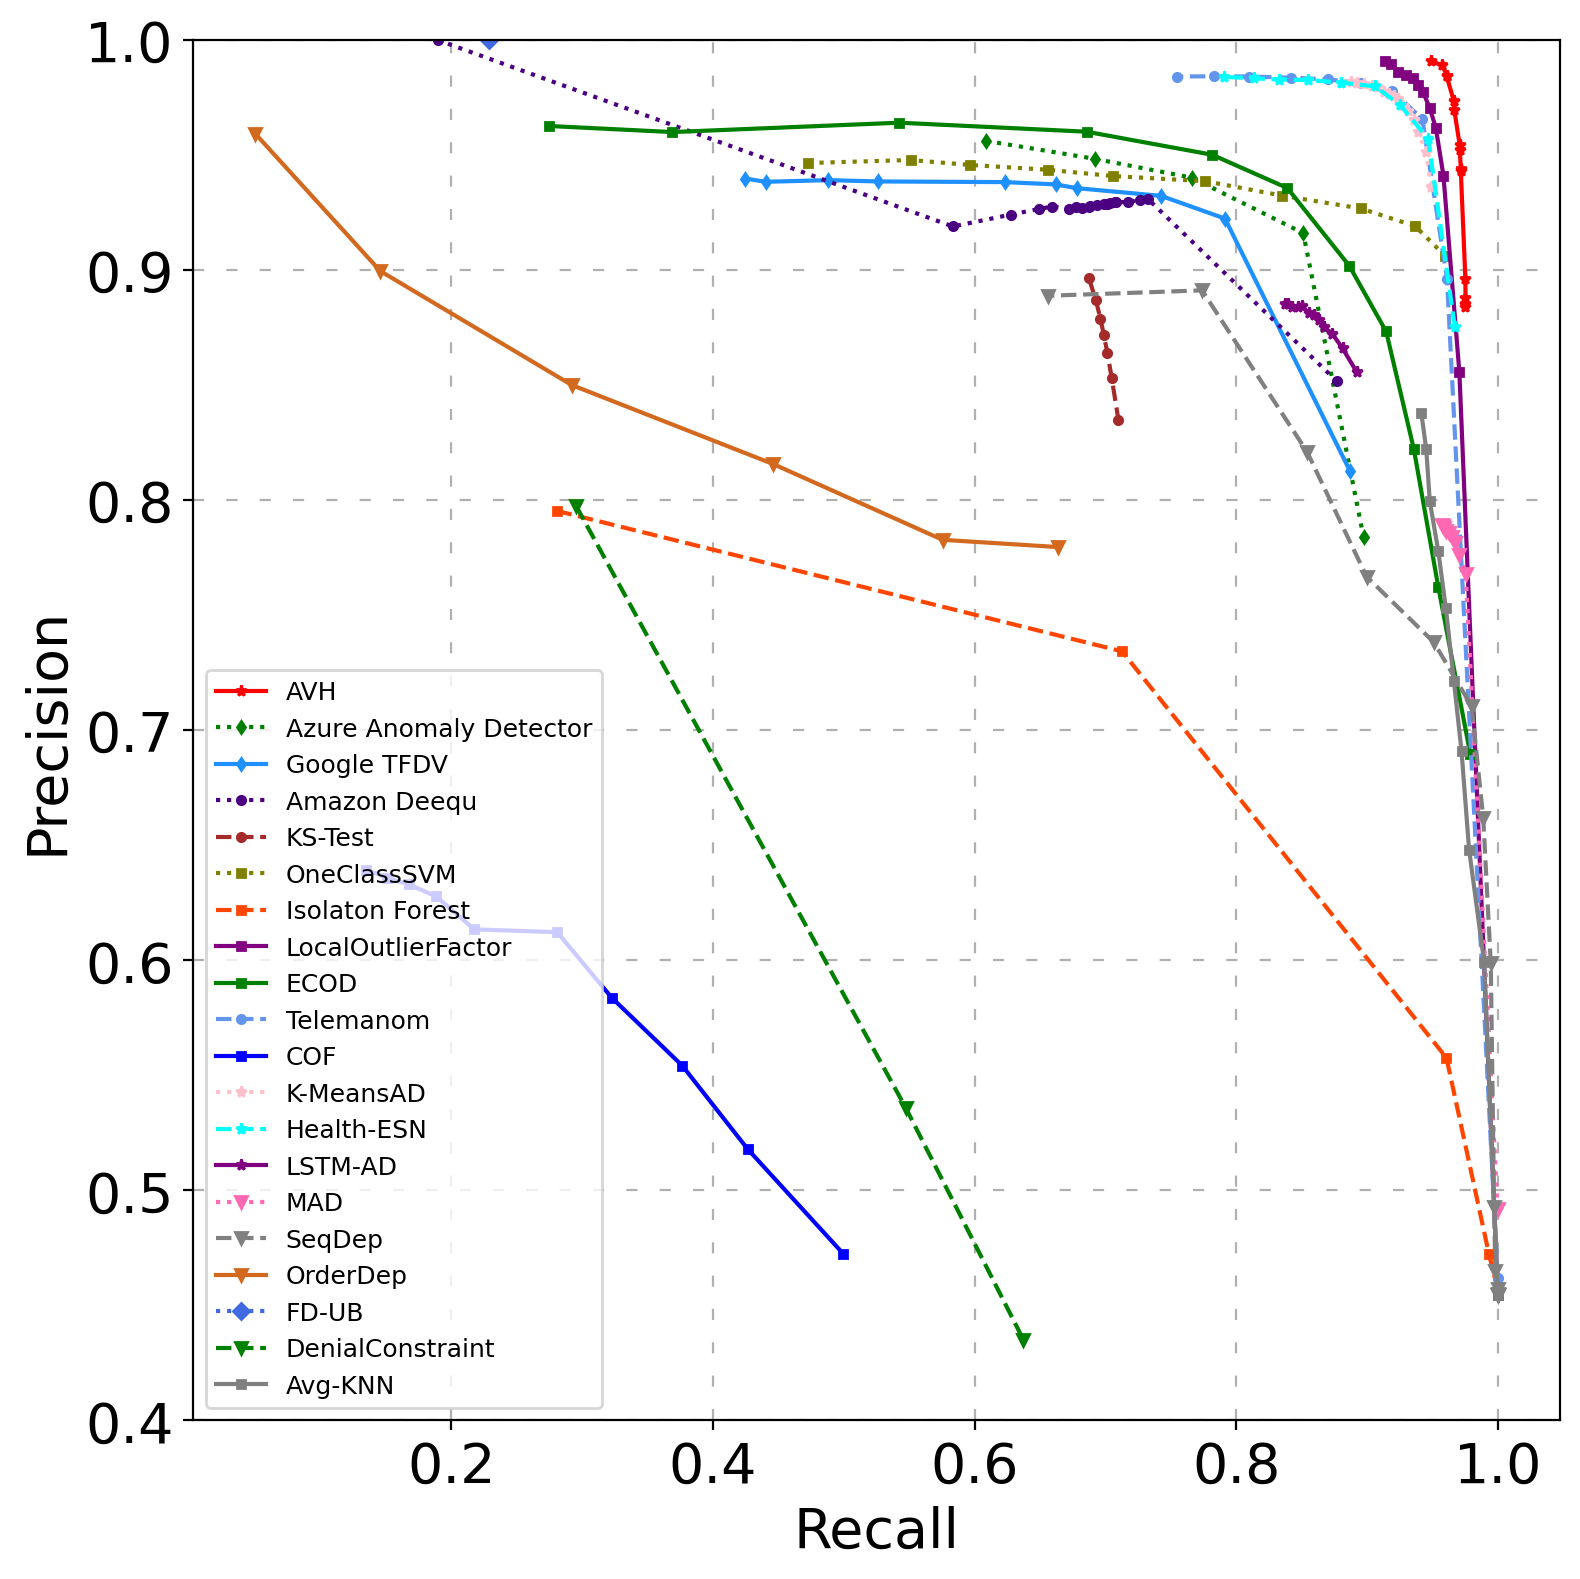

In [177]:
plt.figure(figsize=(8, 8), dpi=200)

# AVH
plt.plot(k_v4_recall_real, k_v4_precision_real, linestyle='solid', linewidth=1.5, 
         label="AVH", marker='*', markersize=4, c='r')
# Azure Anomaly Detector
plt.plot(azure_recall[1:], azure_precision[1:], linestyle='dotted', linewidth=1.5, 
         label="Azure Anomaly Detector", marker='d', markersize=3, c='green')
# TFDV
plt.plot(tfdv_recall_real[4:], tfdv_precision_real[4:], linestyle='solid', linewidth=1.5, 
         label="Google TFDV", marker='d', markersize=3, c='dodgerblue')

# Amazon Deequ
plt.plot(deequ_recall_real, deequ_precision_real, linestyle='dotted', linewidth=1.5, 
         label="Amazon Deequ", marker='o', markersize=3, c='indigo')
# Hypo
plt.plot(hypo_recall_real[1:20][::3], hypo_precision_real[1:20][::3], linestyle='dashed', linewidth=1.5, 
         label="KS-Test", marker='o', markersize=3, c='brown')
Anomaly Detection Method
plt.plot(svm_recall_real[985:995:], svm_precision_real[985:995:], linestyle='dotted', linewidth=1.5, 
         label="OneClassSVM", marker='s', markersize=3, c='olive')
plt.plot(isof_recall_real[999:], isof_precision_real[999:], linestyle='dashed', linewidth=1.5, 
         label="Isolaton Forest", marker='s', markersize=3, c='orangered')
plt.plot(lof_recall_real[980::2], lof_precision_real[980::2], linestyle='solid', linewidth=1.5, 
         label="LocalOutlierFactor", marker='s', markersize=3, c='purple')

plt.plot(ecod_recall_real[4:15], ecod_precision_real[4:15], linestyle='solid', linewidth=1.5, 
         label="ECOD", marker='s', markersize=3, c='green')
plt.plot(tele_recall_real[:1000:100], tele_precision_real[:1000:100], linestyle='dashed', linewidth=1.5, 
         label="Telemanom", marker='o', markersize=3, c='cornflowerblue')
plt.plot(cof_recall_real[100:200:10], cof_precision_real[100:200:10], linestyle='solid', linewidth=1.5, 
         label="COF", marker='s', markersize=3, c='blue')
plt.plot(kmeans_recall_real[10:25:], kmeans_precision_real[10:25:], linestyle='dotted', linewidth=1.5, 
             label="K-MeansAD", marker='*', markersize=4, c='pink')
plt.plot(health_recall_real[1000:1500:50][1:], health_precision_real[1000:1500:50][1:], linestyle='dashed', linewidth=1.5, 
             label="Health-ESN", marker='*', markersize=4, c='cyan')
plt.plot(lstmad_recall_real[::80][1:], lstmad_precision_real[::80][1:], linestyle='solid', linewidth=1.5, 
             label="LSTM-AD", marker='*', markersize=4, c='purple')

plt.plot(mad_recall_real, mad_precision_real,  linestyle='dotted', linewidth=1.5, 
         label="MAD", marker='v', markersize=4, c='hotpink')
plt.plot(recall_real_seq[:-2], precision_real_seq[:-2], linestyle='dashed', linewidth=1.5, 
         label="SeqDep", marker='v', markersize=4, c='grey')
plt.plot(recall_real_order[:6], precision_real_order[:6], linestyle='solid', linewidth=1.5, 
         label="OrderDep", marker='v', markersize=4, c='chocolate')

plt.plot(0.229, 1.0, linestyle='dotted', linewidth=1.5, 
         label="FD-UB", marker='D', markersize=4, c='royalblue')

plt.plot(recall_real_fdorder[:3], precision_real_fdorder[:3], linestyle='dashed', linewidth=1.5, 
             label="DenialConstraint", marker='v', markersize=4, c='green')

plt.plot(knn_recall_real[::5], knn_precision_real[::5], linestyle='solid', linewidth=1.5, 
         label="Avg-KNN", marker='s', markersize=3, c='grey')


plt.xlabel('Recall', fontdict={'size' : 20})
plt.ylabel('Precision', fontdict={'size' : 20})
plt.ylim(0.4, 1.00)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.grid(linestyle=(0, (5, 10)))

plt.legend(loc='lower left', prop={'size': 9})
plt.tight_layout()
plt.show()

## Test on syn

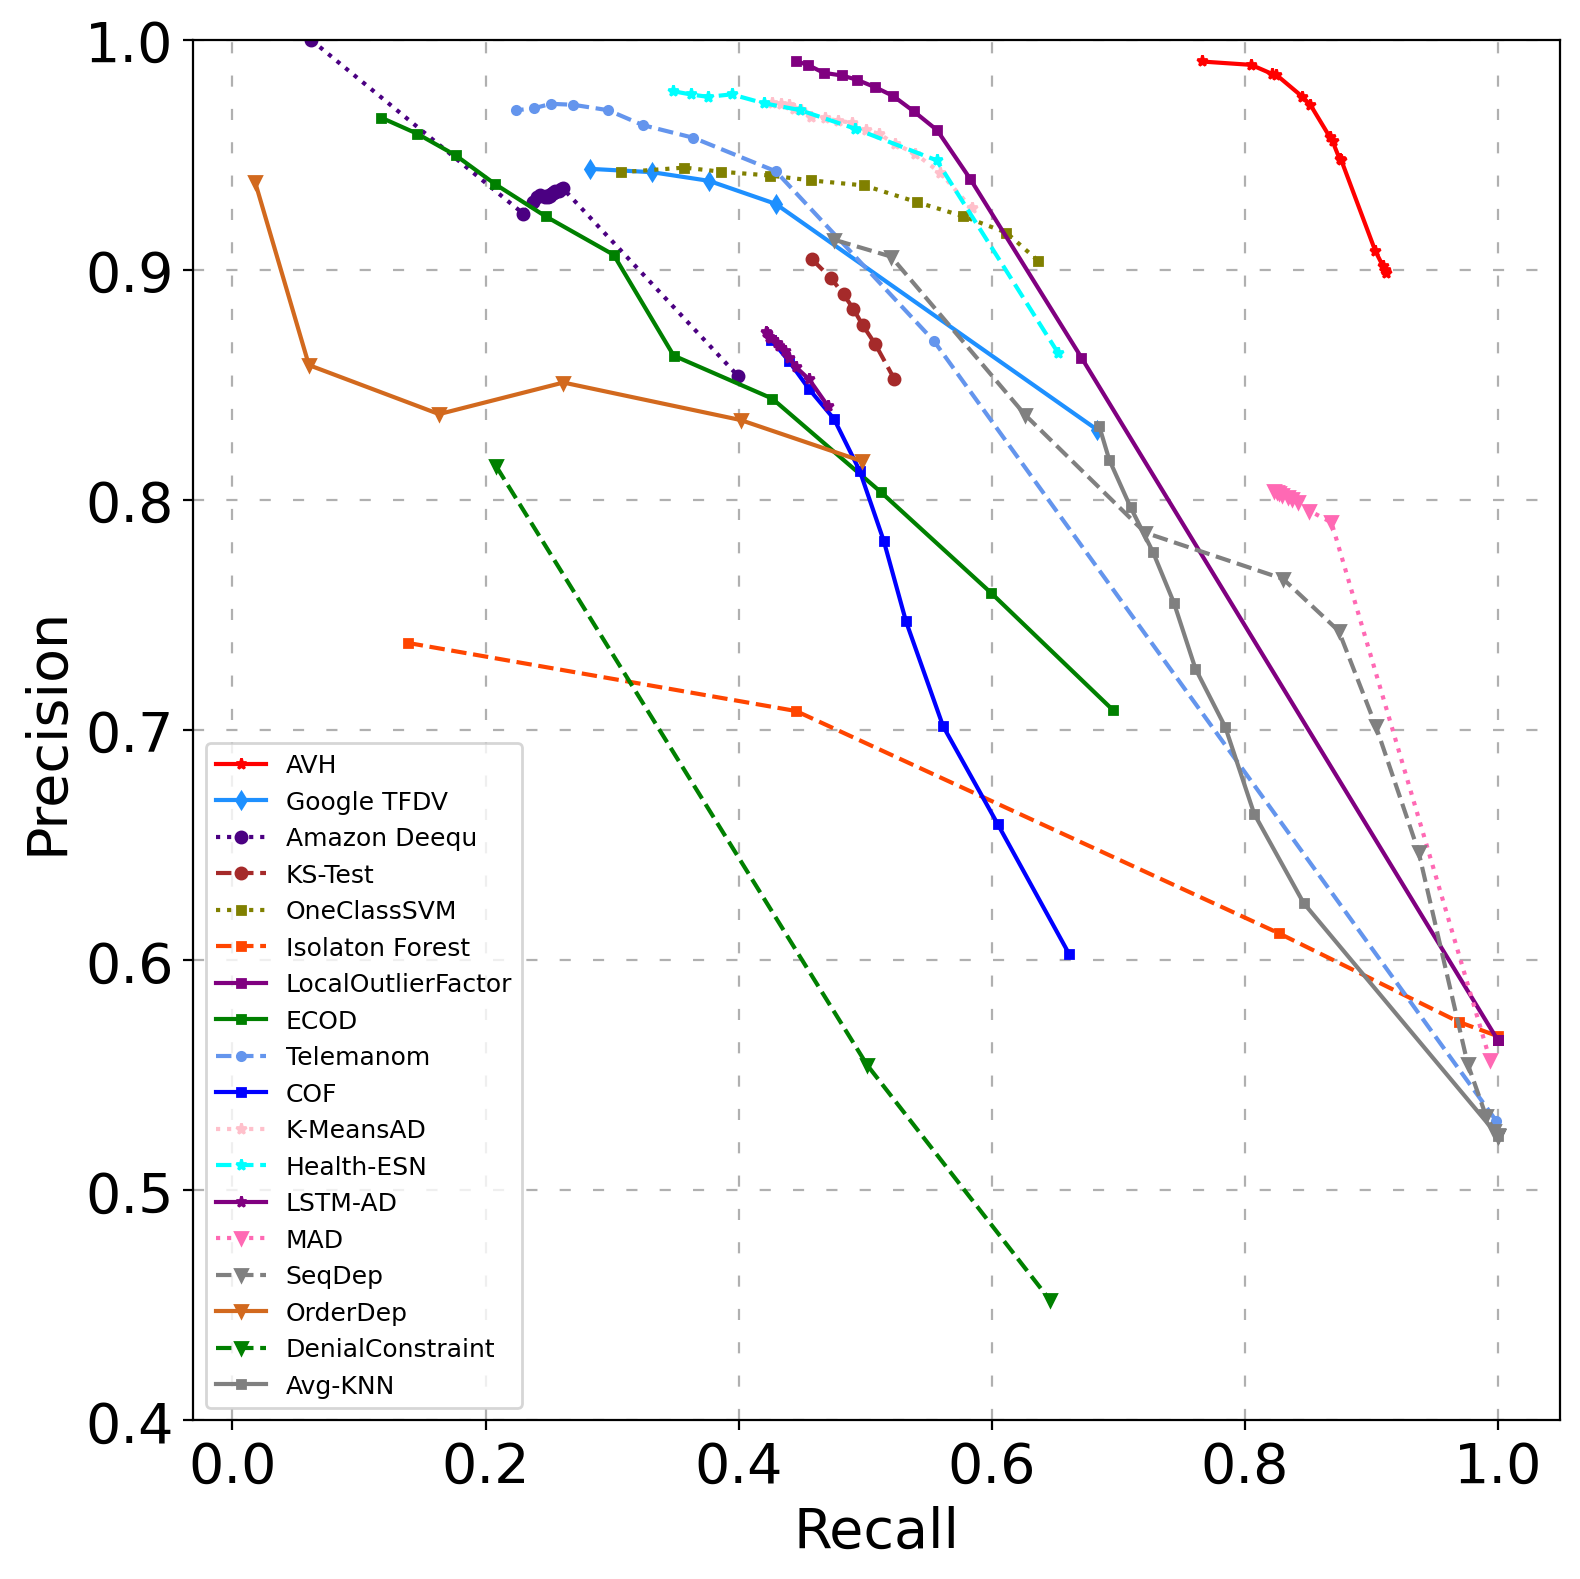

In [178]:
plt.figure(figsize=(8, 8), dpi=200)

# AVH
plt.plot(k_v4_recall_syn, k_v4_precision_syn, linestyle='solid', linewidth=1.5, 
         label="AVH", marker='*', markersize=4, c='r')
# TFDV
plt.plot(tfdv_recall_syn[4:9], tfdv_precision_syn[4:9],  linestyle='solid', linewidth=1.5, 
         label="Google TFDV", marker='d', markersize=4, c='dodgerblue')


# Amazon Deequ
plt.plot(deequ_recall_syn, deequ_precision_syn, linestyle='dotted', linewidth=1.5, 
         label="Amazon Deequ", marker='o', markersize=4, c='indigo')
# hypo
plt.plot(hypo_recall_syn[1:20][::3], hypo_precision_syn[1:20][::3], linestyle='dashed', linewidth=1.5, 
         label="KS-Test", marker='o', markersize=4, c='brown')

# Anomaly Detection Method
plt.plot(svm_recall_syn[985:995:], svm_precision_syn[985:995:], linestyle='dotted', linewidth=1.5, 
         label="OneClassSVM", marker='s', markersize=3, c='olive')
plt.plot(isof_recall_syn[999:], isof_precision_syn[999:], linestyle='dashed', linewidth=1.5, 
         label="Isolaton Forest", marker='s', markersize=3, c='orangered')
plt.plot(lof_recall_syn[980::2], lof_precision_syn[980::2], linestyle='solid', linewidth=1.5, 
         label="LocalOutlierFactor", marker='s', markersize=3, c='purple')


plt.plot(ecod_recall_syn[4:15], ecod_precision_syn[4:15], linestyle='solid', linewidth=1.5, 
         label="ECOD", marker='s', markersize=3, c='green')
plt.plot(tele_recall_syn[:1000:100], tele_precision_syn[:1000:100], linestyle='dashed', linewidth=1.5, 
         label="Telemanom", marker='o', markersize=3, c='cornflowerblue')
plt.plot(cof_recall_syn[100:200:10], cof_precision_syn[100:200:10], linestyle='solid', linewidth=1.5, 
         label="COF", marker='s', markersize=3, c='blue')
plt.plot(kmeans_recall_syn[10:25:], kmeans_precision_syn[10:25:], linestyle='dotted', linewidth=1.5, 
             label="K-MeansAD", marker='*', markersize=4, c='pink')
plt.plot(health_recall_syn[1000:1500:50][1:], health_precision_syn[1000:1500:50][1:], linestyle='dashed', linewidth=1.5, 
             label="Health-ESN", marker='*', markersize=4, c='cyan')
plt.plot(lstmad_recall_syn[::80][1:], lstmad_precision_syn[::80][1:], linestyle='solid', linewidth=1.5, 
             label="LSTM-AD", marker='*', markersize=4, c='purple')

plt.plot(mad_recall_syn, mad_precision_syn,  linestyle='dotted', linewidth=1.5, 
         label="MAD", marker='v', markersize=4, c='hotpink')
plt.plot(recall_syn_seq[:-2], precision_syn_seq[:-2], linestyle='dashed', linewidth=1.5, 
         label="SeqDep", marker='v', markersize=4, c='grey')
plt.plot(recall_syn_order[:6], precision_syn_order[:6], linestyle='solid', linewidth=1.5, 
         label="OrderDep", marker='v', markersize=4, c='chocolate')

plt.plot(recall_syn_fdorder[:3], precision_syn_fdorder[:3], linestyle='dashed', linewidth=1.5, 
             label="DenialConstraint", marker='v', markersize=4, c='green')

plt.plot(knn_recall_syn[::5], knn_precision_syn[::5], linestyle='solid', linewidth=1.5, 
         label="Avg-KNN", marker='s', markersize=3, c='grey')


plt.xlabel('Recall', fontdict={'size' : 20})
plt.ylabel('Precision', fontdict={'size' : 20})
plt.ylim(0.4, 1.00)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.grid(linestyle=(0, (5, 10)))

plt.legend(loc='lower left', prop={'size': 9})
plt.tight_layout()
plt.show()